# Quantum Computing Project

https://arxiv.org/pdf/1712.00854.pdf



In [1]:
import numpy as np
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram

## Demonstration of creating an entangled state

The circuit given below is a sub-circuit of the one present in the paper. This small circuit is just for demonstration of creation of entangled state b/w two qubits

In [26]:
circuit = QuantumCircuit(2, 2)

In [3]:
circuit.h(0)
circuit.h(0)
circuit.h(1)
circuit.cx(1, 0)
circuit.h(0)
circuit.h(1)

In [4]:
circuit.measure([0,1], [0,1])

In [5]:
circuit.draw()



Total count for 00 and 11 are: {'11': 493, '00': 507}


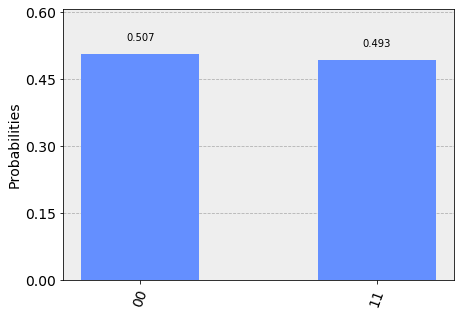

In [9]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1000)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)
plot_histogram(counts)

As can be seen, both qubits are entangled (Bell Pair - $ \frac{|00> + |11>}{\sqrt2} $)

## Entanglement Swapping using the actual circuit given in the paper

### Initial State

This part of the circuit creates the initial state, where (q_0, q_1) and (q_2, q_3) are entangled pairs. At the end of the experiment, we want to swap the entanglement b/w these two pairs.

In [73]:
qR = QuantumRegister(5)
cR = ClassicalRegister(5)

circuit = QuantumCircuit(qR, cR)


In [74]:
# Creating the entangled state. 

circuit.h(qR[0])
circuit.h(qR[0])
circuit.h(qR[1])
circuit.cx(qR[1], qR[0])
circuit.h(qR[0])
circuit.h(qR[1])


circuit.h(qR[2])
circuit.h(qR[2])
circuit.h(qR[3])
circuit.cx(qR[3], qR[2])
circuit.h(qR[2])
circuit.h(qR[3])

circuit.draw()

### Swapping the entanglement

In [75]:
circuit.cx(2,1)
circuit.h(1)
circuit.h(2)

circuit.cx(2,1)
circuit.h(1)
circuit.h(2)

circuit.cx(3,2)
circuit.h(3)
circuit.h(2)

circuit.cx(3,2)
circuit.h(3)
circuit.h(2)

circuit.cx(3,2)
circuit.h(2)
circuit.h(0)

circuit.cx(2,0)
circuit.h(2)
circuit.h(0)

circuit.cx(3,2)
circuit.h(3)
circuit.h(2)

circuit.cx(3,2)
circuit.h(3)
circuit.h(2)

circuit.cx(3,2)

msrC = QuantumCircuit(qR,cR)
msrC.measure(qR[0], cR[0])

(circuit+msrC).draw()

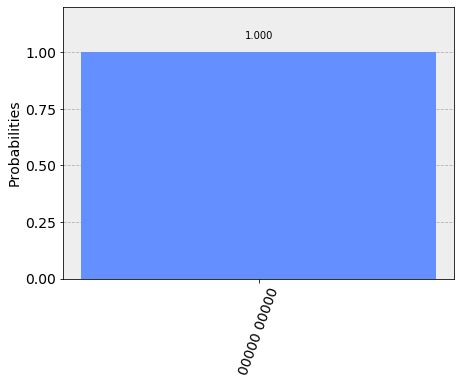

In [64]:
simulator = Aer.get_backend('qasm_simulator')

circ = circuit+msrC
result = execute(circ, simulator, shots=1000).result()
counts  = result.get_counts(circ)

# job = execute(circuit+msrC, simulator, shots=1000)
# result = job.result()
# counts = result.get_counts(circuit+msrC)
# #print("\nTotal count for 00 and 11 are:",counts)
plot_histogram(counts)

### Results

We measure q_0 and q_2. As can be seen, now q_0 and q_2 are entangled $ \frac{|00> + |11>}{\sqrt2} $ . That is, the entanglement has been swapped!

## Tomography


In [47]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
# Needed for functions
import numpy as np
import time
from copy import deepcopy

# Import Qiskit classes
import qiskit 
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, Aer
from qiskit.quantum_info import state_fidelity
from qiskit.providers.aer import noise

# Tomography functions
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
import qiskit.ignis.mitigation.measurement as mc

In [50]:
# Create the ideal density matrix
q2 = QuantumRegister(2)
_bell = QuantumCircuit(q2)
_bell.h(q2[0])
_bell.h(q2[0])
_bell.h(q2[1])
_bell.cx(q2[1], q2[0])
_bell.h(q2[0])
_bell.h(q2[1])
print(_bell)

job = qiskit.execute(_bell, Aer.get_backend('statevector_simulator'))
psi_bell = job.result().get_statevector(_bell)
print(psi_bell)

         ┌───┐┌───┐┌───┐┌───┐
q2_0: |0>┤ H ├┤ H ├┤ X ├┤ H ├
         ├───┤└───┘└─┬─┘├───┤
q2_1: |0>┤ H ├───────■──┤ H ├
         └───┘          └───┘
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


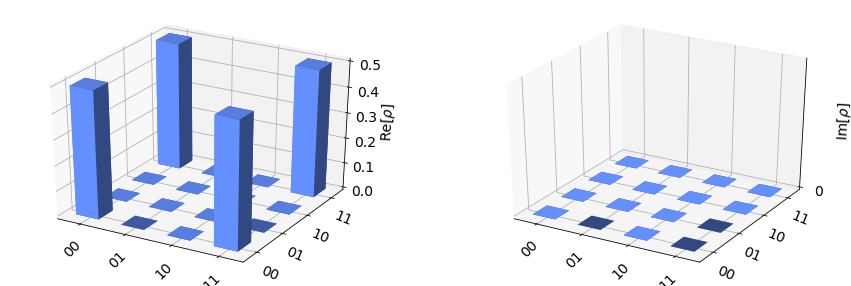

In [51]:
plot_state_city(psi_bell)